Sample rows:
                                       Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0        

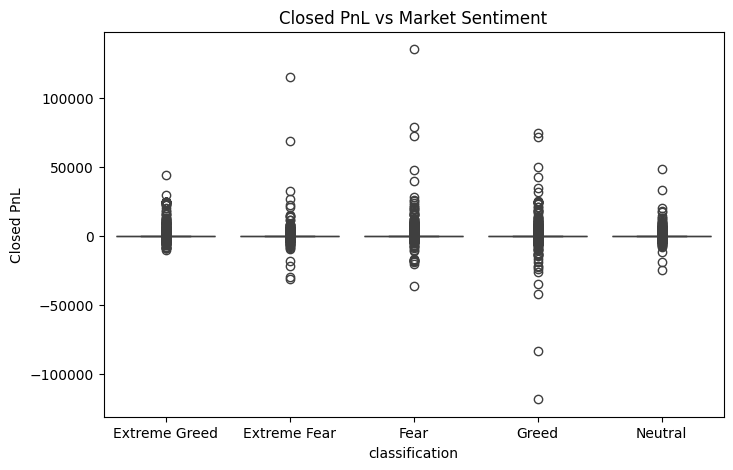

Win Rate by Sentiment:
 classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Dataset
trades_df = pd.read_csv('./historical_data.csv')
sentiment_df = pd.read_csv('./fear_greed_index.csv')

trades_df['time'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])

trades_df['date_only'] = trades_df['time'].dt.date
sentiment_df['date_only'] = pd.to_datetime(sentiment_df['Date'], dayfirst=True).dt.date

merged_df = trades_df.merge(sentiment_df[['date_only', 'classification']], on='date_only', how='left')

merged_df.dropna(subset=['classification'], inplace=True)

print("Sample rows:\n", merged_df.head())
print("Classification distribution:\n", merged_df['classification'].value_counts())

# PnL by Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL vs Market Sentiment")
plt.show()

# Win Rate per Sentiment
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rates = merged_df.groupby('classification')['win'].mean()
print("Win Rate by Sentiment:\n", win_rates)

